<a href="https://colab.research.google.com/github/RiteshopShrivastava/Python/blob/main/Assignment_Clustering_Crime_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

# ***Hierarchical Clustering***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler


In [99]:
crime_data = pd.read_csv("/content/crime_data.csv")
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [100]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [105]:
# normalizing numerical part of data
crime_df_h = crime_data
norm = MinMaxScaler()
crime_minmax = pd.DataFrame(norm.fit_transform(crime_df_h.iloc[:,1:]))
crime_minmax.head()

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


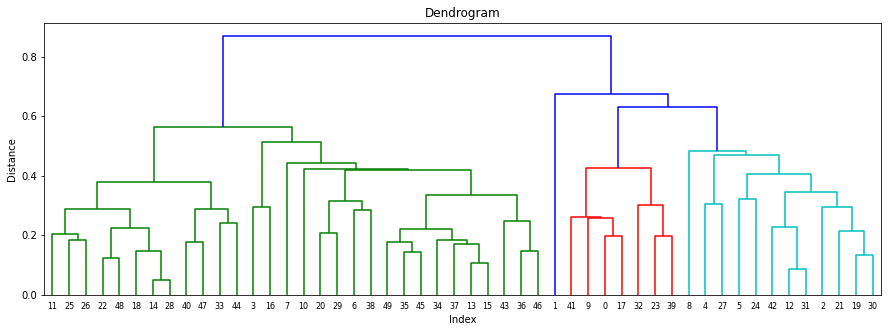

In [104]:
from scipy.cluster.hierarchy import linkage

Z = linkage(crime_minmax, method='average', metric= 'euclidean')
plt.figure(figsize=(15,5))
plt.title("Dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(Z, leaf_rotation=0, leaf_font_size=8)
plt.show()


In [106]:
h_complete = AgglomerativeClustering(n_clusters= 4, affinity= 'euclidean', linkage= "complete").fit(crime_norm)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime_df_h['clust']=cluster_labels # creating a  new column and assigning it to new column 
crime_df_h.head(15)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [108]:
crime_df_h.iloc[:,1:].groupby(crime_df_h.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,14.087500,252.750000,53.500000,24.5375,0
1,5.715000,132.300000,70.800000,18.1000,1
2,3.180000,78.700000,49.300000,11.6300,2
3,10.883333,256.916667,78.333333,32.2500,3


*Inference : From above information we can say that crime in cluster '0' & '3' are more*

# ***K-Means***

In [75]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [114]:
crime_kmeans = pd.read_csv("/content/crime_data.csv")
crime_kmeans.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [115]:
scaler = StandardScaler()
crime_scaled = scaler.fit_transform(crime_kmeans.iloc[:, 1:])
crime_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

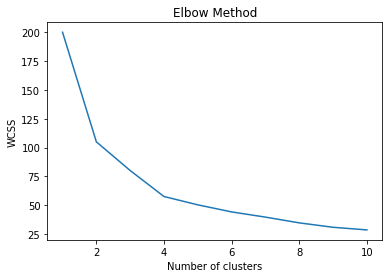

In [116]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(crime_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **Cluster algorithm for K=4**

In [126]:
# Building cluster algorithm
clusters_4 = KMeans(n_clusters=4, random_state= 0)
clusters_4.fit(crime_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [127]:
clusters_4.labels_

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 3, 1, 2, 3, 2, 3, 0, 3, 1, 2, 1,
       3, 0, 1, 3, 3, 1, 3, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 1, 2,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [128]:
crime_kmeans['clust_id'] = clusters_4.labels_
crime_kmeans.head(15)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust_id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,0


In [129]:
crime_kmeans.groupby('clust_id').mean()

,Murder,Assault,UrbanPop,Rape
clust_id,,,,
0,13.937500,243.625000,53.750000,21.412500
1,10.815385,257.384615,76.000000,33.192308
2,5.656250,138.875000,73.875000,18.781250
3,3.600000,78.538462,52.076923,12.176923


***Inference : From above information we can say that crime in cluster '0' & '1' are more***

# **Cluster algorithm for K=5**

In [130]:
# Building cluster algorithm
clusters_5 = KMeans(n_clusters=5, random_state= 0)
clusters_5.fit(crime_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [131]:
clusters_5.labels_

array([3, 1, 1, 2, 1, 1, 0, 0, 1, 3, 0, 4, 1, 2, 4, 2, 2, 3, 4, 1, 0, 1,
       4, 3, 1, 2, 2, 1, 4, 0, 1, 1, 3, 4, 0, 2, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 2, 0, 4, 4, 2], dtype=int32)

In [132]:
crime_kmeans['clust_id'] = clusters_5.labels_
crime_kmeans.head(15)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust_id
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [133]:
crime_kmeans.groupby('clust_id').mean()

,Murder,Assault,UrbanPop,Rape
clust_id,,,,
0,5.036364,138.727273,78.181818,18.654545
1,10.815385,257.384615,76.000000,33.192308
2,7.100000,134.000000,59.888889,18.222222
3,14.671429,251.285714,54.285714,21.685714
4,2.680000,70.100000,51.000000,10.910000


***Inference : From above information we can say that crime in cluster '1' & '3' are more***

# **DBSCAN**

In [5]:
crime_db = pd.read_csv('crime_data.csv')
crime_db.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crime_db_scaled = scaler.fit_transform(crime_db.iloc[:,1:])
crime_db_scaled


array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [51]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=6)
dbscan.fit(crime_db_scaled)

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [52]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [53]:
crime_db['clusters']=dbscan.labels_
crime_db.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
